### PROBLEM STATEMENT

#### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all datasets
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
#Getting dataframe info
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
#Getting dataframe shape
churn_data.shape

(99999, 226)

In [5]:
#Getting dataframe colums list
churn_data.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [6]:
#converting column name in standard pattern
churn_data.rename(columns={'jun_vbc_3g': "vbc_3g_6", 'jul_vbc_3g': "vbc_3g_7", 'aug_vbc_3g': "vbc_3g_8", 
                           'sep_vbc_3g': "vbc_3g_9"}, inplace=True)
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [7]:
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [8]:
#getting list of columns which has rech_amt or rech_data
col = churn_data.filter(regex='rech_amt|rech_data').columns

In [9]:
#creating df with the derived columns which has rech_amt or rech_data
df=churn_data[col]
df.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,...,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,...,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN
1,74,384,283,121,44,154,65,50,NaN,7/25/2014,...,2.0,NaN,NaN,154.0,25.0,NaN,NaN,154.0,50.0,NaN
2,168,315,116,358,86,200,86,100,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0
3,230,310,601,410,60,50,50,50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,196,350,287,200,56,110,110,50,6/4/2014,NaN,...,NaN,NaN,56.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [10]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 24 columns):
total_rech_amt_6            99999 non-null int64
total_rech_amt_7            99999 non-null int64
total_rech_amt_8            99999 non-null int64
total_rech_amt_9            99999 non-null int64
max_rech_amt_6              99999 non-null int64
max_rech_amt_7              99999 non-null int64
max_rech_amt_8              99999 non-null int64
max_rech_amt_9              99999 non-null int64
date_of_last_rech_data_6    25153 non-null object
date_of_last_rech_data_7    25571 non-null object
date_of_last_rech_data_8    26339 non-null object
date_of_last_rech_data_9    25922 non-null object
total_rech_data_6           25153 non-null float64
total_rech_data_7           25571 non-null float64
total_rech_data_8           26339 non-null float64
total_rech_data_9           25922 non-null float64
max_rech_data_6             25153 non-null float64
max_rech_data_7             25571 non-null f

In [11]:
#calculating null percent of df
round(100*(df.isnull().sum()/len(df.index)),2)

total_rech_amt_6             0.00
total_rech_amt_7             0.00
total_rech_amt_8             0.00
total_rech_amt_9             0.00
max_rech_amt_6               0.00
max_rech_amt_7               0.00
max_rech_amt_8               0.00
max_rech_amt_9               0.00
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
dtype: float64

In [12]:
#getting good month columns
columns_for_good_month = ['total_rech_amt_6','max_rech_amt_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_6',
                          'total_rech_amt_7','max_rech_amt_7','total_rech_data_7','max_rech_data_7','av_rech_amt_data_7']
df.loc[:,columns_for_good_month].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6,total_rech_amt_7,max_rech_amt_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000,99999.000000,99999.000000,25571.000000,25571.000000,25571.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982,322.962970,104.752398,2.666419,126.729459,200.981292
std,398.019701,120.614894,2.789128,108.477235,192.646318,408.114237,124.523970,3.031593,109.765267,196.791224
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000
25%,109.000000,30.000000,1.000000,25.000000,82.000000,100.000000,30.000000,1.000000,25.000000,92.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000,220.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000,428.000000,128.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000,40335.000000,4010.000000,54.000000,1555.000000,4365.000000


In [13]:
#imputing good months columns
churn_data.total_rech_data_6.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_6.fillna(value=0, inplace=True)
churn_data.total_rech_data_7.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_7.fillna(value=0, inplace=True)
churn_data.total_rech_data_8.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_8.fillna(value=0, inplace=True)
churn_data.total_rech_data_9.fillna(value=0, inplace=True)
churn_data.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [14]:
#Calculating todal data recharged for all months
churn_data['total_rech_data_val_6'] = churn_data['total_rech_data_6']*churn_data['av_rech_amt_data_6']
churn_data['total_rech_data_val_7'] = churn_data['total_rech_data_7']*churn_data['av_rech_amt_data_7']
churn_data['total_rech_data_val_8'] = churn_data['total_rech_data_8']*churn_data['av_rech_amt_data_8']
churn_data['total_rech_data_val_9'] = churn_data['total_rech_data_9']*churn_data['av_rech_amt_data_9']

In [15]:
#dropping drop columns as we already have all info in derived columns
drop_column_list= ['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7',
                   'total_rech_data_8','av_rech_amt_data_8','total_rech_data_9','av_rech_amt_data_9']
churn_data.drop(drop_column_list, inplace=True, axis=1)

In [16]:
#getting good time average recharge amount
churn_data['good_time_avg_rch_mnt'] = ((churn_data.total_rech_amt_6 + churn_data.total_rech_data_val_6) 
                                       + (churn_data.total_rech_amt_7 + churn_data.total_rech_data_val_7))/2

In [17]:
print(churn_data.good_time_avg_rch_mnt.quantile(0.7))

478.0


In [18]:
#missing_data = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
#print(missing_data[missing_data >= 70])
#churn_data.drop(missing_data[missing_data > 70].index, axis=1, inplace=True)

In [19]:
churn_data.shape

(99999, 223)

In [20]:
#Removing data which is not in the range of .7 percentile
churn_data= churn_data[(churn_data['good_time_avg_rch_mnt']> churn_data['good_time_avg_rch_mnt'].quantile(0.7))]
churn_data.shape

(29953, 223)

In [21]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 223 entries, mobile_number to good_time_avg_rch_mnt
dtypes: float64(176), int64(35), object(12)
memory usage: 51.2+ MB


In [22]:
churn_data.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [23]:
#looking for the list of columns with no varience
unique_churn_data = churn_data.nunique().sort_values(ascending=False)
unique_count_one = unique_churn_data[unique_churn_data == 1]
unique_count_one

last_date_of_month_8    1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
std_og_t2c_mou_9        1
last_date_of_month_9    1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_ic_t2o_mou_9        1
dtype: int64

In [24]:
#creating the list of unique columns
unique_drop_col = list(unique_count_one.index)

In [25]:
#Dropping the unique columns as we won't get any varience in it for our model
churn_data.drop(unique_drop_col, axis=1, inplace=True)

In [26]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 207 entries, mobile_number to good_time_avg_rch_mnt
dtypes: float64(165), int64(34), object(8)
memory usage: 47.5+ MB


In [27]:
#Evaluating null values in percent
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
arpu_9                    0.00
onnet_mou_6               1.81
onnet_mou_7               1.79
onnet_mou_8               3.91
onnet_mou_9               6.34
offnet_mou_6              1.81
offnet_mou_7              1.79
offnet_mou_8              3.91
offnet_mou_9              6.34
roam_ic_mou_6             1.81
roam_ic_mou_7             1.79
roam_ic_mou_8             3.91
roam_ic_mou_9             6.34
roam_og_mou_6             1.81
roam_og_mou_7             1.79
roam_og_mou_8             3.91
roam_og_mou_9             6.34
loc_og_t2t_mou_6          1.81
loc_og_t2t_mou_7          1.79
loc_og_t2t_mou_8          3.91
loc_og_t2t_mou_9          6.34
loc_og_t2m_mou_6          1.81
loc_og_t2m_mou_7          1.79
loc_og_t2m_mou_8          3.91
loc_og_t2m_mou_9          6.34
loc_og_t2f_mou_6          1.81
                         ...  
monthly_2g_6              0.00
monthly_

In [28]:
#Evaluating null values
missing_rows_data = churn_data.isnull().sum(axis=1)
missing_rows_data[missing_rows_data > 0]

0         89
7         59
8         16
21        32
23         8
38        24
41        32
48        32
67        44
69        32
73        24
77        51
86        51
87         8
91         9
96        32
103       32
111       78
115       16
124        8
131       32
146       24
154       32
157        8
158        8
173        8
184       24
188       80
191        9
193        8
        ... 
99851    108
99854     16
99857     24
99858      8
99859     32
99866      8
99868      8
99870     32
99885     32
99887     32
99893     32
99896     32
99902     16
99904     32
99921     16
99922     16
99923      9
99924     32
99925      8
99931     16
99935      8
99937     32
99939     32
99941     32
99955      8
99963     24
99965     32
99970      8
99981      9
99988      8
Length: 19967, dtype: int64

In [29]:
churn_data.shape

(29953, 207)

In [30]:
pd.set_option('display.max_columns', 200)
# Creating new dataframe
churn_df_temp_1 = churn_data[churn_data.isnull().sum(axis=1)>=24]

In [31]:
# Looking out for relation between max_rech_data_6 and other 6th month column
data_churn_month_6=churn_df_temp_1.columns[churn_data[pd.isnull(churn_data['date_of_last_rech_data_6'])].isna().all()]

In [32]:
list(data_churn_month_6)

['date_of_last_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_6']

In [33]:
# Looking out for relation between max_rech_data_7 and other 7th month column
data_churn_month_7=churn_df_temp_1.columns[churn_data[pd.isnull(churn_data['date_of_last_rech_data_7'])].isna().all()]

In [34]:
list(data_churn_month_7)

['date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_7']

In [35]:
# Looking out for relation between max_rech_data_8 and other 8th month column
data_churn_month_8=churn_df_temp_1.columns[churn_data[pd.isnull(churn_data['date_of_last_rech_data_8'])].isna().all()]

In [36]:
list(data_churn_month_8)

['date_of_last_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'fb_user_8']

In [37]:
# replacing null value with 0
churn_data.loc[:, list(data_churn_month_6)] = churn_data.loc[:, list(data_churn_month_6)].fillna(0)

In [38]:
# replacing null value with 0
churn_data.loc[:, list(data_churn_month_7)] = churn_data.loc[:, list(data_churn_month_7)].fillna(0)

In [39]:
# replacing null value with 0
churn_data.loc[:, list(data_churn_month_8)] = churn_data.loc[:, list(data_churn_month_8)].fillna(0)

In [40]:
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
arpu_9                    0.00
onnet_mou_6               1.81
onnet_mou_7               1.79
onnet_mou_8               3.91
onnet_mou_9               6.34
offnet_mou_6              1.81
offnet_mou_7              1.79
offnet_mou_8              3.91
offnet_mou_9              6.34
roam_ic_mou_6             1.81
roam_ic_mou_7             1.79
roam_ic_mou_8             3.91
roam_ic_mou_9             6.34
roam_og_mou_6             1.81
roam_og_mou_7             1.79
roam_og_mou_8             3.91
roam_og_mou_9             6.34
loc_og_t2t_mou_6          1.81
loc_og_t2t_mou_7          1.79
loc_og_t2t_mou_8          3.91
loc_og_t2t_mou_9          6.34
loc_og_t2m_mou_6          1.81
loc_og_t2m_mou_7          1.79
loc_og_t2m_mou_8          3.91
loc_og_t2m_mou_9          6.34
loc_og_t2f_mou_6          1.81
                         ...  
monthly_2g_6              0.00
monthly_

In [41]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 207 entries, mobile_number to good_time_avg_rch_mnt
dtypes: float64(165), int64(34), object(8)
memory usage: 47.5+ MB


In [42]:
# Droping 9th month date field as we don't need 
churn_data = churn_data.drop(['date_of_last_rech_9','date_of_last_rech_data_9'], axis=1)

In [43]:
# getting date column
col_date = churn_data.filter(regex='date').columns

In [44]:
col_date

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [45]:
churn_data[list(col_date)].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014,0,0,0
8,6/25/2014,7/31/2014,8/30/2014,0,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,0,0,0
23,6/18/2014,7/7/2014,8/24/2014,0,7/7/2014,8/6/2014


In [46]:
#creating derived column based on date columns as we are only cnsidering user has done recharge in a particular month 
recharged_in_month = ['rech_in_month_6','rech_in_month_7','rech_in_month_8','rech_data_in_month_6','rech_data_in_month_7','rech_data_in_month_8' ]

churn_data[recharged_in_month] = churn_data[col_date].applymap(lambda x: 0 if x==0 else 1)


In [47]:
churn_data[recharged_in_month].head()

,rech_in_month_6,rech_in_month_7,rech_in_month_8,rech_data_in_month_6,rech_data_in_month_7,rech_data_in_month_8
0,1,1,1,1,1,1
7,1,1,1,0,0,0
8,1,1,1,0,1,1
21,1,1,1,0,0,0
23,1,1,1,0,1,1


In [48]:
# Fixing the format of date column
churn_data[col_date] = churn_data[col_date].apply( lambda x : pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))

In [49]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 211 entries, mobile_number to rech_data_in_month_8
dtypes: datetime64[ns](6), float64(165), int64(40)
memory usage: 48.4 MB


In [50]:
churn_data[col_date]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
23,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06
33,2014-06-30,2014-07-30,2014-08-26,2014-06-30,2014-07-28,2014-08-26
38,2014-06-30,2014-07-28,2014-08-24,NaT,NaT,NaT
41,2014-06-24,2014-07-22,2014-08-31,NaT,NaT,NaT
48,2014-06-29,2014-07-23,2014-08-28,NaT,NaT,NaT
53,2014-06-29,2014-07-31,2014-08-26,2014-06-29,2014-07-26,2014-08-02


In [51]:
# Getting 6th month column
col_date_6 = churn_data.filter(regex='_6').columns
col_date_6

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6',
       'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'vol_2g_mb_6',
       'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6',
       'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6',
       'fb_user_6', 'vbc_3g_6', 'total_rech_dat

In [52]:
churn_data[list(churn_data[col_date_6])].head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6,vbc_3g_6,total_rech_data_val_6,rech_in_month_6,rech_data_in_month_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,2014-06-21,252,2014-06-21,252.0,0.0,1.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0,101.20,252.0,1,1
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.0,422.16,4.30,49.89,6.66,60.86,0.0,4.5,0.0,487.53,58.14,217.56,152.16,427.88,36.89,91.44,52.19,180.54,626.46,0.21,2.06,15.74,5,1580,1580,2014-06-27,0,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,18.74,0.0,1,0
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.0,0.0,0.0,508.36,23.84,57.58,0.00,81.43,0.00,22.43,0.00,22.43,103.86,0.00,0.00,0.00,19,437,90,2014-06-25,50,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,122.16,0.0,1,0
21,514.453,102.41,757.93,0.00,0.00,4.48,91.81,0.75,0.0,97.04,97.93,665.36,0.00,763.29,0.0,0.0,0.0,860.34,2.48,118.23,4.61,125.33,14.06,67.69,0.00,81.76,207.09,0.00,0.00,0.00,22,600,50,2014-06-30,30,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00,0.0,1,0
23,74.350,48.96,85.41,0.00,0.00,48.96,82.94,0.00,0.0,131.91,0.00,2.36,0.00,2.36,0.0,0.1,0.0,134.38,20.71,95.91,0.00,116.63,0.51,2.43,0.00,2.94,119.58,0.00,0.00,0.00,3,0,0,2014-06-18,0,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00,0.0,1,0


In [53]:
churn_data[churn_data['onnet_mou_6'].isna()][list(churn_data[col_date_6])].head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6,vbc_3g_6,total_rech_data_val_6,rech_in_month_6,rech_data_in_month_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4,362,252,2014-06-21,252,2014-06-21,252.0,0.0,1.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0,101.20,252.0,1,1
77,30.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4,0,0,2014-06-17,0,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00,0.0,1,0
364,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4,0,0,2014-06-24,0,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00,0.0,1,0
414,20.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,NaT,0,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00,0.0,1,0
423,213.802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4,252,252,2014-06-27,252,2014-06-27,252.0,0.0,1.0,3.30,669.36,212.17,212.17,0.0,0,0,1,0,1.0,63.04,252.0,1,1


In [54]:
# replacing 6th month column null column with 0
churn_data[list(churn_data[col_date_6])]= churn_data[list(churn_data[col_date_6])].fillna(0)

In [55]:
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
arpu_9                    0.00
onnet_mou_6               0.00
onnet_mou_7               1.79
onnet_mou_8               3.91
onnet_mou_9               6.34
offnet_mou_6              0.00
offnet_mou_7              1.79
offnet_mou_8              3.91
offnet_mou_9              6.34
roam_ic_mou_6             0.00
roam_ic_mou_7             1.79
roam_ic_mou_8             3.91
roam_ic_mou_9             6.34
roam_og_mou_6             0.00
roam_og_mou_7             1.79
roam_og_mou_8             3.91
roam_og_mou_9             6.34
loc_og_t2t_mou_6          0.00
loc_og_t2t_mou_7          1.79
loc_og_t2t_mou_8          3.91
loc_og_t2t_mou_9          6.34
loc_og_t2m_mou_6          0.00
loc_og_t2m_mou_7          1.79
loc_og_t2m_mou_8          3.91
loc_og_t2m_mou_9          6.34
loc_og_t2f_mou_6          0.00
                         ...  
sachet_2g_8               0.00
sachet_2

In [56]:
# Getting 7th month column
col_date_7 = churn_data.filter(regex='_7').columns
col_date_7

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
       'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7',
       'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7',
       'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7',
       'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7',
       'date_of_last_rech_7', 'last_day_rch_amt_7', 'date_of_last_rech_data_7',
       'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'vol_2g_mb_7',
       'vol_3g_mb_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7',
       'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7',
       'fb_user_7', 'vbc_3g_7', 'total_rech_dat

In [57]:
churn_data[list(churn_data[col_date_7])].head()

,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rch_amt_7,date_of_last_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,fb_user_7,vbc_3g_7,total_rech_data_val_7,rech_in_month_7,rech_data_in_month_7
0,214.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,3,252,252,2014-07-16,252,2014-07-16,252.0,0.0,1.0,1.32,150.76,212.17,212.17,0.0,0,0,1,0,1.0,0.00,252.0,1,1
7,1349.850,54.68,567.16,33.49,12.59,31.38,447.38,55.14,0.0,533.91,23.29,31.76,20.08,75.14,0.18,0.0,0.0,609.24,32.26,221.49,101.46,355.23,11.83,126.99,34.24,173.08,558.04,0.0,14.53,15.19,5,790,790,2014-07-25,0,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,19.38,0.0,1,0
8,492.223,351.03,80.63,0.00,0.00,217.59,70.58,0.00,0.0,288.18,133.43,10.04,0.00,143.48,0.00,0.0,0.0,431.66,9.84,13.98,0.00,23.83,0.58,4.08,0.00,4.66,28.49,0.0,0.00,0.00,21,601,154,2014-07-31,0,2014-07-31,154.0,2.0,0.0,356.00,750.95,0.00,0.00,0.0,1,1,0,0,1.0,910.65,354.0,1,1
21,597.753,132.11,896.68,0.00,0.00,6.16,87.93,0.00,0.0,94.09,125.94,808.74,0.00,934.69,0.00,0.0,0.0,1028.79,10.19,74.63,2.84,87.68,5.98,38.23,0.00,44.21,131.89,0.0,0.00,0.00,26,680,50,2014-07-31,20,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00,0.0,1,0
23,193.897,50.66,89.36,0.00,0.00,50.66,83.01,0.00,0.0,133.68,0.00,6.35,0.00,6.35,0.01,0.0,0.0,140.04,61.04,113.36,0.00,174.41,0.00,14.89,0.00,14.89,222.89,0.0,28.23,5.35,5,454,179,2014-07-07,179,2014-07-07,179.0,0.0,2.0,0.48,599.09,306.57,301.78,0.0,0,0,2,0,1.0,51.86,712.0,1,1


In [58]:
churn_data[churn_data['onnet_mou_7'].isna()][list(churn_data[col_date_7])].head()

,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rch_amt_7,date_of_last_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,fb_user_7,vbc_3g_7,total_rech_data_val_7,rech_in_month_7,rech_data_in_month_7
0,214.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3,252,252,2014-07-16,252,2014-07-16,252.0,0.0,1.0,1.32,150.76,212.17,212.17,0.0,0,0,1,0,1.0,0.00,252.0,1,1
539,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3,0,0,2014-07-31,0,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00,0.0,1,0
687,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,0,0,2014-07-15,0,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00,0.0,1,0
1138,61.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3,49,49,2014-07-18,0,2014-07-12,49.0,0.0,1.0,103.69,816.99,61.38,41.82,0.0,0,0,0,1,1.0,779.19,49.0,1,1
1489,76.826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2,91,91,2014-07-15,0,2014-07-09,91.0,0.0,1.0,230.56,14.59,77.68,77.68,0.0,0,0,0,1,1.0,0.00,91.0,1,1


In [59]:
# replacing 7th month column null column with 0
churn_data[list(churn_data[col_date_7])]= churn_data[list(churn_data[col_date_7])].fillna(0)

In [60]:
# Getting 7th month column
col_date_8 = churn_data.filter(regex='_8').columns
col_date_8

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'date_of_last_rech_data_8',
       'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'vol_2g_mb_8',
       'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'fb_user_8', 'vbc_3g_8', 'total_rech_dat

In [61]:
churn_data[list(churn_data[col_date_8])].head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,vbc_3g_8,total_rech_data_val_8,rech_in_month_8,rech_data_in_month_8
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,2014-08-08,252,2014-08-08,252.0,0.0,1.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0,30.40,252.0,1,1
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,2014-08-26,779,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,57.74,0.0,1,0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,2014-08-30,10,2014-08-23,23.0,3.0,0.0,0.03,11.94,19.83,0.00,0.0,0,3,0,0,1.0,21.03,207.0,1,1
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,2014-08-31,50,NaT,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,0.00,0.0,1,0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,2014-08-24,0,2014-08-06,179.0,0.0,2.0,0.01,1009.92,197.27,150.67,0.0,0,0,1,1,1.0,40.45,540.0,1,1


In [62]:
churn_data[churn_data['onnet_mou_8'].isna()][list(churn_data[col_date_8])].head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,vbc_3g_8,total_rech_data_val_8,rech_in_month_8,rech_data_in_month_8
111,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5,0,0,2014-08-24,0,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.00,0.0,1,0
188,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,NaT,0,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.00,0.0,1,0
358,707.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3,0,0,2014-08-29,0,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,1.22,0.0,1,0
527,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3,0,0,2014-08-31,0,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.00,0.0,1,0
539,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,0,0,2014-08-01,0,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.00,0.0,1,0


In [63]:
# replacing 7th month column null column with 0
churn_data[list(churn_data[col_date_8])]= churn_data[list(churn_data[col_date_8])].fillna(0)

In [64]:
#Evaluating missing values
missing_rows_data = churn_data.isnull().sum(axis=1)
missing_rows_data[missing_rows_data > 0]

0        34
7        34
8         7
21        7
41        7
48        7
67       34
69        7
73        7
77        7
86       34
96        7
103       7
111      34
115       7
131       7
146       7
154       7
184       7
188      34
195       7
199       7
226       7
235       7
241       7
252       7
255       7
256       7
266       7
281       7
         ..
99802     7
99815     7
99818     7
99821     7
99823     7
99827    34
99836     7
99850     7
99851    34
99854     7
99857     7
99859     7
99866     7
99868     7
99870     7
99885     7
99887     7
99893     7
99896     7
99902     7
99904     7
99921     7
99923     7
99924     7
99937     7
99939     7
99941     7
99963     7
99965     7
99981     7
Length: 15013, dtype: int64

In [65]:
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
arpu_9                    0.00
onnet_mou_6               0.00
onnet_mou_7               0.00
onnet_mou_8               0.00
onnet_mou_9               6.34
offnet_mou_6              0.00
offnet_mou_7              0.00
offnet_mou_8              0.00
offnet_mou_9              6.34
roam_ic_mou_6             0.00
roam_ic_mou_7             0.00
roam_ic_mou_8             0.00
roam_ic_mou_9             6.34
roam_og_mou_6             0.00
roam_og_mou_7             0.00
roam_og_mou_8             0.00
roam_og_mou_9             6.34
loc_og_t2t_mou_6          0.00
loc_og_t2t_mou_7          0.00
loc_og_t2t_mou_8          0.00
loc_og_t2t_mou_9          6.34
loc_og_t2m_mou_6          0.00
loc_og_t2m_mou_7          0.00
loc_og_t2m_mou_8          0.00
loc_og_t2m_mou_9          6.34
loc_og_t2f_mou_6          0.00
                         ...  
sachet_2g_8               0.00
sachet_2

In [66]:
churn_data[col_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21 00:00:00,2014-07-16 00:00:00,2014-08-08 00:00:00,2014-06-21 00:00:00,2014-07-16 00:00:00,2014-08-08 00:00:00
7,2014-06-27 00:00:00,2014-07-25 00:00:00,2014-08-26 00:00:00,0,0,0
8,2014-06-25 00:00:00,2014-07-31 00:00:00,2014-08-30 00:00:00,0,2014-07-31 00:00:00,2014-08-23 00:00:00
21,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,0,0,0
23,2014-06-18 00:00:00,2014-07-07 00:00:00,2014-08-24 00:00:00,0,2014-07-07 00:00:00,2014-08-06 00:00:00


In [67]:
churn_data.shape

(29953, 211)

In [68]:
#getting numeric column 
cols=churn_data.columns
num_cols = churn_data._get_numeric_data().columns

In [69]:
#extracting column 
cat_col=list(set(cols) - set(num_cols))
cat_col

['date_of_last_rech_data_7',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_8',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6']

In [70]:
#Dropping date column
churn_data=churn_data.drop(cat_col, axis=1)

In [71]:
churn_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,...,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_val_6,total_rech_data_val_7,total_rech_data_val_8,total_rech_data_val_9,good_time_avg_rch_mnt,rech_in_month_6,rech_in_month_7,rech_in_month_8,rech_data_in_month_6,rech_data_in_month_7,rech_data_in_month_8
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.00,NaN,0.0,0.0,0.00,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.16,NaN,0.00,0.00,4.13,NaN,0.00,0.00,1.15,NaN,0.00,0.00,5.44,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,...,0.00,0.00,5.44,0.00,0.00,0.0,0.0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,0.0,559.0,1,1,1,1,1,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,

In [72]:
#Evaluating churn data for churn phase
churn_data['churn'] =((churn_data.total_ic_mou_9 == 0) & (churn_data.total_og_mou_9 == 0) &
                      (churn_data.vol_2g_mb_9 == 0) & (churn_data.vol_3g_mb_9 == 0))

In [73]:
#updating churn column with flag churn/non-churn
churn_data['churn'] = churn_data['churn'].map({True : 1, False : 0})

In [74]:
#getting churn percent
round(100*(len(churn_data.loc[churn_data['churn']==1])/len(churn_data)),2)

8.12

In [75]:
#getting columns containing 9 month data
col_list_9 = churn_data.filter(regex='_9').columns

In [76]:
col_list_9

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9',
       'total_rech_data_val_9'],
      dtype='object')

In [77]:
#Dropping columns of 9th month 
churn_data.drop(col_list_9,axis=1,inplace=True)

In [78]:
churn_data.shape

(29953, 157)

In [79]:
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
                        ... 
monthly_2g_6             0.0
monthly_2g_7             0.0
monthly_2g_8             0.0
sachet_2g_6   

In [80]:
#Dropping mobile no as its unique for each row and will not help
churn_data = churn_data.drop('mobile_number', axis=1)

In [81]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
churn_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_val_6,total_rech_data_val_7,total_rech_data_val_8,good_time_avg_rch_mnt,rech_in_month_6,rech_in_month_7,rech_in_month_8,rech_data_in_month_6,rech_data_in_month_7,rech_data_in_month_8,churn
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,2

### Exploratory Data Analysis

Text(0.5, 1.0, 'Churn')

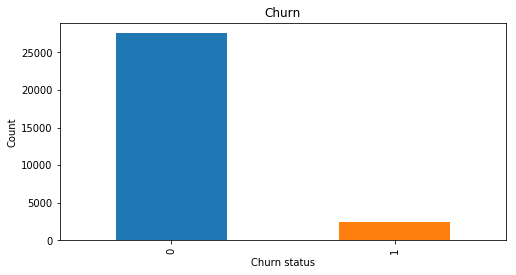

In [82]:
#Looking for churn vs non-churn data
plt.figure(figsize=(8,4))
churn_data['churn'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn',fontsize=12)

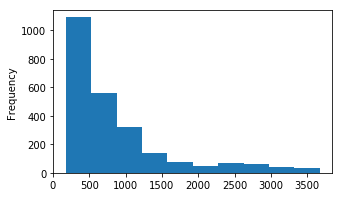

In [83]:
# Analysing time on network
plt.figure(figsize=(5,3))
churn_data.loc[churn_data.churn==1,'aon'].plot.hist()

##### We can see that most of churn case happen before 1500 days

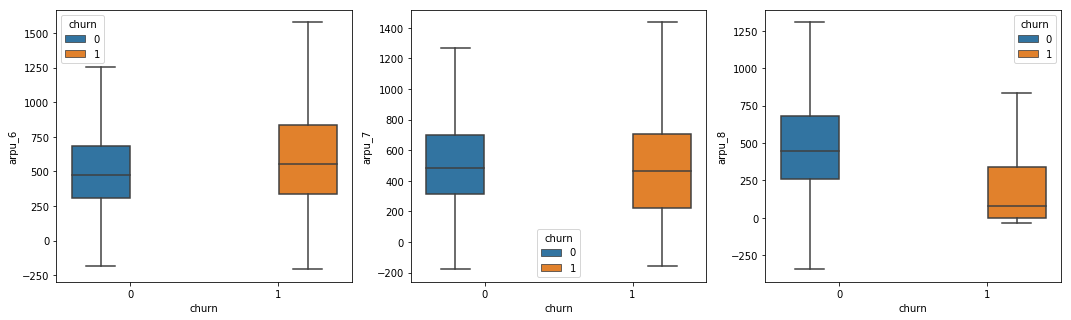

In [84]:
# Analysing arpu for 6,7 and 8 months
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.boxplot(data=churn_data, y='arpu_6', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[0])
sns.boxplot(data=churn_data, y='arpu_7', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[1])
sns.boxplot(data=churn_data, y='arpu_8', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[2])
plt.show()

#### We can see that average revenue also drops for the churn users in action month

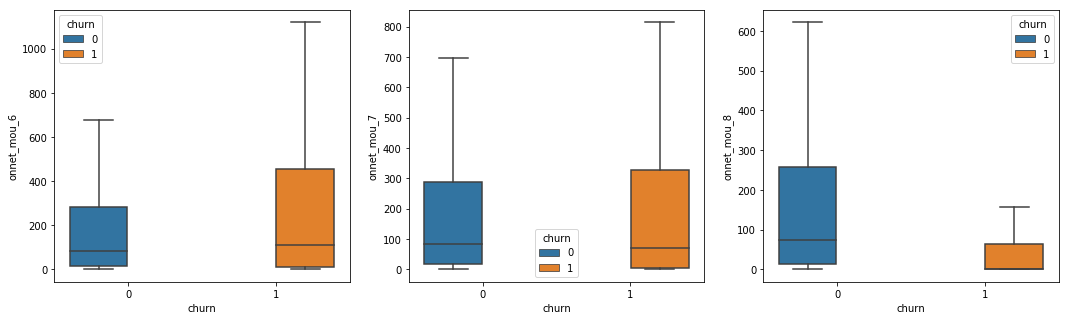

In [85]:
# Analysing onnet_mou_6 for 6,7 and 8 months
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.boxplot(data=churn_data, y='onnet_mou_6', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[0])
sns.boxplot(data=churn_data, y='onnet_mou_7', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[1])
sns.boxplot(data=churn_data, y='onnet_mou_8', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[2])
plt.show()

#### We can see that average on network time also drops for the churn users in action month

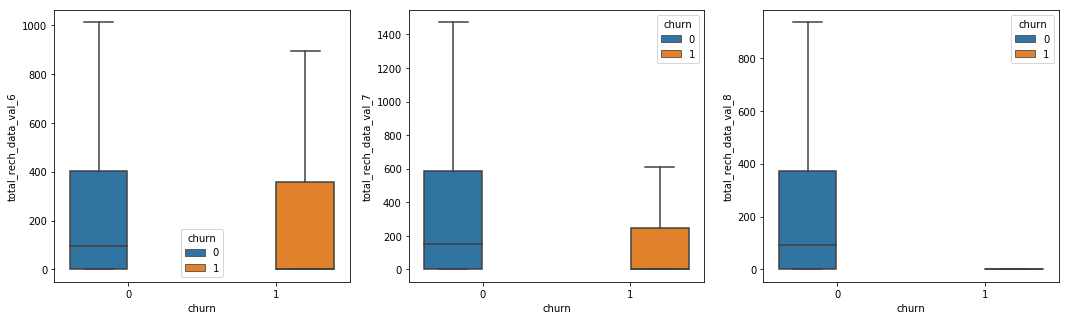

In [86]:
# Analysing total_rech_data_val_6 for 6,7 and 8 months
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.boxplot(data=churn_data, y='total_rech_data_val_6', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[0])
sns.boxplot(data=churn_data, y='total_rech_data_val_7', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[1])
sns.boxplot(data=churn_data, y='total_rech_data_val_8', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[2])
plt.show()

#### We can see that total recharge for data also drops for the churn users in action month

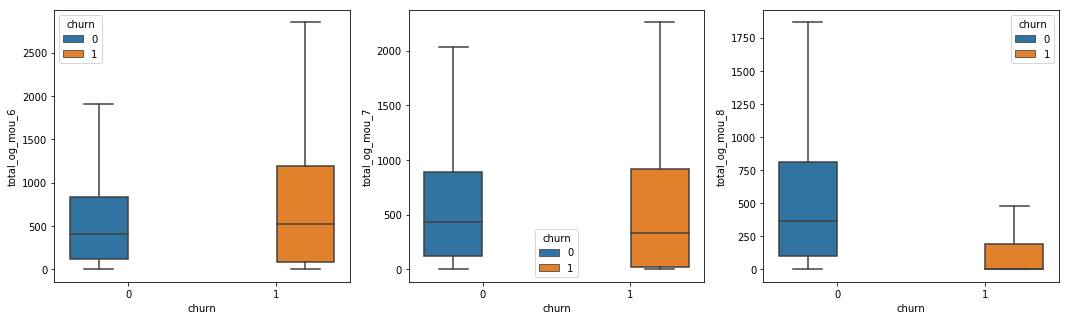

In [87]:
# Analysing total_og_mou_6 for 6,7 and 8 months
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.boxplot(data=churn_data, y='total_og_mou_6', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[0])
sns.boxplot(data=churn_data, y='total_og_mou_7', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[1])
sns.boxplot(data=churn_data, y='total_og_mou_8', x='churn', hue="churn", linewidth=1.5, showfliers=False, ax=axes[2])
plt.show()

##### There is drop in calls for home network for churn users

### Checking Outlier

In [88]:
Q1 = churn_data.quantile(0.25)
Q3 = churn_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

arpu_6                    390.098
arpu_7                    388.758
arpu_8                    430.138
onnet_mou_6               273.400
onnet_mou_7               274.500
onnet_mou_8               230.190
offnet_mou_6              416.300
offnet_mou_7              424.050
offnet_mou_8              392.100
roam_ic_mou_6               0.000
roam_ic_mou_7               0.000
roam_ic_mou_8               0.000
roam_og_mou_6               0.000
roam_og_mou_7               0.000
roam_og_mou_8               0.000
loc_og_t2t_mou_6           73.680
loc_og_t2t_mou_7           73.880
loc_og_t2t_mou_8           69.590
loc_og_t2m_mou_6          189.820
loc_og_t2m_mou_7          188.040
loc_og_t2m_mou_8          183.900
loc_og_t2f_mou_6            4.230
loc_og_t2f_mou_7            4.380
loc_og_t2f_mou_8            3.930
loc_og_t2c_mou_6            0.000
loc_og_t2c_mou_7            0.100
loc_og_t2c_mou_8            0.010
loc_og_mou_6              300.050
loc_og_mou_7              299.030
loc_og_mou_8  

In [89]:
print(churn_data < (Q1 - 1.5 * IQR)) | (churn_data > (Q3 + 1.5 * IQR))

       arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       False   False   False        False        False        False   
7       False   False   False        False        False        False   
8       False   False   False        False        False        False   
21      False   False   False        False        False        False   
23      False   False   False        False        False        False   
33      False   False   False        False        False        False   
38      False   False   False        False        False        False   
41      False   False   False        False        False        False   
48      False   False   False        False        False        False   
53      False   False   False        False        False        False   
56      False   False   False        False        False        False   
57      False   False   False        False        False        False   
61      False   False   False        False        False        F

TypeError: Could not compare [None] with block values

##### So, we can see that there are no outliers

### Feature Standardization

In [ ]:
from sklearn.model_selection import train_test_split

# Creating training and test sets
# Splitting the data into train and test
X = churn_data.drop('churn',axis=1)
Y = churn_data['churn']

# Rescaling the features
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(X),  index=X.index,columns=X.columns)

# train test split with train_size=80% and test size=20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# churn percentage in test set
round(100*(y_test.astype('category').value_counts()[1:2]/y_test.shape[0]),2)

In [ ]:
# churn percentage in training set
round(100*(y_train.astype('category').value_counts()[1:2]/y_train.shape[0]),2)

In [ ]:
import sklearn
sklearn.__version__

In [ ]:

from sklearn import metrics
import time

In [ ]:
#Improting the PCA module
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
#Doing the PCA on the train data
pca.fit(x_train)

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.title("Scree plot")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#Creating PC with 110 components
pca_final = PCA(svd_solver='randomized', n_components=110,random_state=100)

In [ ]:
#Transforming Training data
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

In [101]:
#Transforming test data
df_test_pca = pca_final.transform(x_test)
df_test_pca.shape

(5991, 110)

###  Grid search for logistic regression(using class weight to handle class imbalance)

In [102]:

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import time
# conduct (grid search) cross-validation to find the optimal values 

from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05,0.95,20)

parameters = {'C': [0.01, 0.1, 1, 10], 'penalty':['l1', 'l2'], 'class_weight': [{0:x,1:1.0-x} for x in weights] }

import multiprocessing
n_jobs = multiprocessing.cpu_count()

logm =LogisticRegression()

start = time.time()
# create a classifier to perform grid search
clf1 = GridSearchCV(logm, cv=5, param_grid=parameters,n_jobs=n_jobs, scoring='f1')

# fit
clf1.fit(df_train_pca, y_train)

end = time.time()
print((end - start)/60)

10.522539289792379


In [103]:
# printing the optimal score and hyperparameters
print('We can get score of',clf1.best_score_,'using',clf1.best_params_)

We can get score of 0.5665347596317184 using {'C': 10, 'class_weight': {0: 0.28684210526315784, 1: 0.7131578947368422}, 'penalty': 'l2'}


In [104]:
# Logistic regression model with best params 
logm_best =LogisticRegression(**clf1.best_params_)

In [105]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#training the regression model
#learner_pca2 = LogisticRegression()
model_pca = logm_best.fit(df_train_pca,y_train)

In [106]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

#### So, we are getting ROC/AUC score of 89%

### training performance

In [108]:
 # Predicted probabilities
    
y_pred = model_pca.predict_proba(df_train_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.191201
1,0.000026
2,0.003474
3,0.189405
4,0.038791


In [109]:
# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,churn
88442,0
13000,1
59119,0
88360,0
75004,0


In [110]:
# Putting CustID to index
y_train_df['CustID'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob', 0 : 'churn'})

# Let's see the head of y_pred_final
y_pred_final.head()

,churn,CustID,Churn_Prob
0,0,88442,0.191201
1,1,13000,0.000026
2,0,59119,0.003474
3,0,88360,0.189405
4,0,75004,0.038791


In [111]:
# Adding predicted column for different cut-offs
accuracy = []
sensitivity = []
precision = []
for i in np.arange(0.1,1,0.05):
    z="pred_"+str(round(i,2))
    y_pred_final[z] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
    confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[z] )
    accuracy.append(metrics.accuracy_score(y_pred_final.churn, y_pred_final[z]))
    sensitivity.append(metrics.recall_score(y_pred_final.churn,  y_pred_final[z]))
    precision.append(metrics.precision_score(y_pred_final.churn,  y_pred_final[z]))
# Let's see the head
y_pred_final.head()

,churn,CustID,Churn_Prob,pred_0.1,pred_0.15,pred_0.2,pred_0.25,pred_0.3,pred_0.35,pred_0.4,pred_0.45,pred_0.5,pred_0.55,pred_0.6,pred_0.65,pred_0.7,pred_0.75,pred_0.8,pred_0.85,pred_0.9,pred_0.95
0,0,88442,0.191201,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,13000,0.000026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,59119,0.003474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,88360,0.189405,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,75004,0.038791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


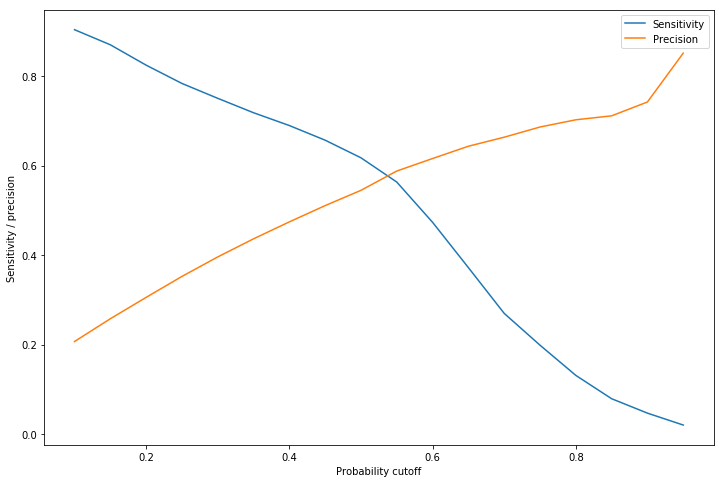

In [112]:
fig = plt.figure(figsize = (12,8))
x=np.arange(0.1,1,0.05)
#plt.plot(x,accuracy)
plt.plot(x,sensitivity)
plt.plot(x,precision)
plt.xlabel('Probability cutoff')
plt.ylabel('Sensitivity / precision')
plt.legend(['Sensitivity', 'Precision'], loc='upper right')
plt.show()

In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final['pred_0.55'] )
confusion

array([[21232,   773],
       [  855,  1102]], dtype=int64)

In [116]:
#Let's check the overall accuracy.
print("Accuracy: ", metrics.accuracy_score(y_pred_final.churn, y_pred_final['pred_0.55']))
print("Recall/Sensitivity: ",metrics.recall_score(y_pred_final.churn, y_pred_final['pred_0.55']))
print("Precision: ", metrics.precision_score(y_pred_final.churn, y_pred_final['pred_0.55']))
print("ROC/AUC Score: ", metrics.roc_auc_score(y_pred_final.churn, y_pred_final['Churn_Prob']))

Accuracy:  0.932059093564811
Recall/Sensitivity:  0.5631067961165048
Precision:  0.5877333333333333
ROC/AUC Score:  0.9006516960829151


##### We are getting training recall score of 56.3% and precision of 58.8%. Also, we are getting ROC/AOC score of 90.1% and accuracy of 93%

### Test Performance

In [117]:
 # Predicted probabilities
    
y_pred = model_pca.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.168683
1,0.145692
2,0.020641
3,0.045706
4,0.082564


In [118]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
98766,0
4004,0
32194,0
51170,0
32711,0


In [119]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,churn,CustID,Churn_Prob
0,0,98766,0.168683
1,0,4004,0.145692
2,0,32194,0.020641
3,0,51170,0.045706
4,0,32711,0.082564


In [123]:
# Adding predicted column for different cut-offs
accuracy = []
sensitivity = []
precision = []
for i in np.arange(0.1,1,0.05):
    z="pred_"+str(round(i,2))
    y_pred_final[z] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
    confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[z] )
    accuracy.append(metrics.accuracy_score(y_pred_final.churn, y_pred_final[z]))
    sensitivity.append(metrics.recall_score(y_pred_final.churn,  y_pred_final[z]))
    precision.append(metrics.precision_score(y_pred_final.churn,  y_pred_final[z]))
# Let's see the head
y_pred_final.head()

,churn,CustID,Churn_Prob,pred_0.1,pred_0.15,pred_0.2,pred_0.25,pred_0.3,pred_0.35,pred_0.4,pred_0.45,pred_0.5,pred_0.55,pred_0.6,pred_0.65,pred_0.7,pred_0.75,pred_0.8,pred_0.85,pred_0.9,pred_0.95
0,0,98766,0.168683,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4004,0.145692,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,32194,0.020641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,51170,0.045706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,32711,0.082564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


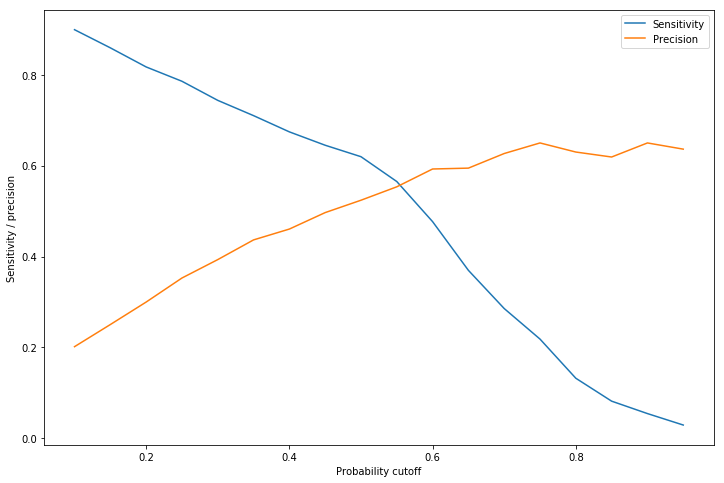

In [125]:
fig = plt.figure(figsize = (12,8))
x=np.arange(0.1,1,0.05)
#plt.plot(x,accuracy)
plt.plot(x,sensitivity)
plt.plot(x,precision)
plt.xlabel('Probability cutoff')
plt.ylabel('Sensitivity / precision')
plt.legend(['Sensitivity', 'Precision'], loc='upper right')
plt.show()

In [126]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final['pred_0.55'] )
confusion

array([[5298,  217],
       [ 207,  269]], dtype=int64)

In [128]:
#Let's check the overall accuracy.
print("Accuracy: ", metrics.accuracy_score(y_pred_final.churn, y_pred_final['pred_0.55']))
print("Recall/Sensitivity: ",metrics.recall_score(y_pred_final.churn, y_pred_final['pred_0.55']))
print("Precision: ", metrics.precision_score(y_pred_final.churn, y_pred_final['pred_0.55']))
print("ROC/AUC Score: ", metrics.roc_auc_score(y_pred_final.churn, y_pred_final['Churn_Prob']))


Accuracy:  0.9292271740944751
Recall/Sensitivity:  0.5651260504201681
Precision:  0.5534979423868313
ROC/AUC Score:  0.8910983795149974


##### We are getting test recall score of 56.5% and precision of 55.3%. Also, we are getting ROC/AOC score of 89.1% and accuracy of 93%

##### As the training and test performance are similar so we can say it's a robost model 

## Feature Selection using RFE

#### model for identifying important predictor attributes 

In [129]:
import statsmodels.api as sm

In [131]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C= 10, class_weight= {0: 0.28684210526315784, 1: 0.7131578947368422}, penalty= 'l2')

In [132]:
from sklearn.feature_selection import RFE
start = time.time()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(x_train, y_train)
end = time.time()
print((end - start)/60)

9.183181436856588


In [133]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 107),
 ('arpu_8', False, 48),
 ('onnet_mou_6', False, 98),
 ('onnet_mou_7', False, 37),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 45),
 ('offnet_mou_7', False, 38),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 99),
 ('roam_ic_mou_7', False, 70),
 ('roam_ic_mou_8', False, 133),
 ('roam_og_mou_6', False, 132),
 ('roam_og_mou_7', False, 19),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 97),
 ('loc_og_t2t_mou_7', False, 15),
 ('loc_og_t2t_mou_8', False, 14),
 ('loc_og_t2m_mou_6', False, 29),
 ('loc_og_t2m_mou_7', False, 85),
 ('loc_og_t2m_mou_8', False, 61),
 ('loc_og_t2f_mou_6', False, 40),
 ('loc_og_t2f_mou_7', False, 66),
 ('loc_og_t2f_mou_8', False, 62),
 ('loc_og_t2c_mou_6', False, 63),
 ('loc_og_t2c_mou_7', False, 64),
 ('loc_og_t2c_mou_8', False, 75),
 ('loc_og_mou_6', False, 106),
 ('loc_og_mou_7', False, 86),
 ('loc_og_mou_8', False, 72),
 ('std_og_t2t_mou_6', False, 88),
 ('std_og_t2t_mou_7', False, 112),
 (

In [201]:
#columns selected by RFE
col = x_train.columns[rfe.support_]
col

Index(['arpu_6', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_8',
       'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8'],
      dtype='object')

In [202]:
#Creating first model
X_train_sm = sm.add_constant(x_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23962
Model:                            GLM   Df Residuals:                    23946
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4553.0
Date:                Mon, 19 Aug 2019   Deviance:                       9106.1
Time:                        23:22:35   Pearson chi2:                 2.07e+12
No. Iterations:                    12   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2590      0.089    -47.727      0.000      -4.434      -4.084
arpu_6                 0.4192      0.032     13.295      0.000       0.357       0.481
onnet_mou_8           -0.8592      0.195     -4.410      0.000      -1.241      -0.477
offnet_mou_8          -1.3251      0.172     -7.702      0.000      -1.662      -0.988
roam_og_mou_8          0.3429      0.038      9.043      0.000       0.269       0.417
std_og_t2t_mou_8       0.5124      0.176      2.914      0.004       0.168       0.857
std_og_t2m_mou_8       0.8609      0.155      5.565      0.000       0.558       1.164
isd_og_mou_8          -0.1615      0.040     -4.085      0.000      -0.239      -0.084
og_others_8           -3.4027      3.240     -1.050      0.294      -9.754       2.948
loc_ic_mou_8          -1.3257      0.215     -6.152      0.000      -1.748      -0.903
total_ic_mou_7         0.6213      0.058     10.631      0.000       0.507       0.736
total_ic_mou_8        -1.4103      0.189     -7.462      0.000      -1.781      -1.040
spl_ic_mou_8          -0.4134      0.063     -6.546      0.000      -0.537      -0.290
total_rech_num_8      -0.4941      0.054     -9.174      0.000      -0.600      -0.389
last_day_rch_amt_8    -0.4835      0.050     -9.693      0.000      -0.581      -0.386
fb_user_8             -0.7830      0.037    -21.381      0.000      -0.855      -0.711
======================================================================================
"""

In [203]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

88442    0.091165
13000    0.000052
59119    0.001389
88360    0.091890
75004    0.023573
71507    0.013812
12175    0.312372
38816    0.000291
44002    0.001789
32392    0.147362
dtype: float64

In [204]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
88442,0,0.091165,88442
13000,1,0.000052,13000
59119,0,0.001389,59119
88360,0,0.091890,88360
75004,0,0.023573,75004


In [205]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
88442,0,0.091165,88442,0
13000,1,0.000052,13000,0
59119,0,0.001389,59119,0
88360,0,0.091890,88360,0
75004,0,0.023573,75004,0


In [206]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [207]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[21803   202]
 [ 1484   473]]


In [208]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print(metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final['Churn_Prob']))

0.9296385944411986
0.24169647419519674
0.7007407407407408
0.8873064571541956


In [209]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_ic_mou_8,7.08
2,offnet_mou_8,5.54
8,loc_ic_mou_8,5.46
5,std_og_t2m_mou_8,4.97
1,onnet_mou_8,4.08
4,std_og_t2t_mou_8,4.07
9,total_ic_mou_7,3.22
0,arpu_6,1.48
12,total_rech_num_8,1.32
6,isd_og_mou_8,1.29


In [210]:
# Dropping total_ic_mou_8 based on VIF
col = col.drop('total_ic_mou_8', 1)
col

Index(['arpu_6', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_8',
       'loc_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'fb_user_8'],
      dtype='object')

In [211]:
# Second Model
X_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23962
Model:                            GLM   Df Residuals:                    23947
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4602.5
Date:                Mon, 19 Aug 2019   Deviance:                       9205.1
Time:                        23:22:38   Pearson chi2:                 7.52e+12
No. Iterations:                    12   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2463      0.089    -47.616      0.000      -4.421      -4.071
arpu_6                 0.4368      0.032     13.687      0.000       0.374       0.499
onnet_mou_8           -0.8748      0.197     -4.441      0.000      -1.261      -0.489
offnet_mou_8          -1.3720      0.174     -7.866      0.000      -1.714      -1.030
roam_og_mou_8          0.3608      0.038      9.425      0.000       0.286       0.436
std_og_t2t_mou_8       0.4789      0.178      2.688      0.007       0.130       0.828
std_og_t2m_mou_8       0.8365      0.157      5.314      0.000       0.528       1.145
isd_og_mou_8          -0.1950      0.041     -4.708      0.000      -0.276      -0.114
og_others_8           -3.4294      3.220     -1.065      0.287      -9.740       2.881
loc_ic_mou_8          -2.3376      0.149    -15.720      0.000      -2.629      -2.046
total_ic_mou_7         0.2634      0.038      6.870      0.000       0.188       0.339
spl_ic_mou_8          -0.4312      0.064     -6.773      0.000      -0.556      -0.306
total_rech_num_8      -0.5272      0.054     -9.760      0.000      -0.633      -0.421
last_day_rch_amt_8    -0.5270      0.051    -10.379      0.000      -0.627      -0.427
fb_user_8             -0.7999      0.036    -21.995      0.000      -0.871      -0.729
======================================================================================
"""

In [212]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [213]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [214]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
88442,0,0.083454,88442,0
13000,1,0.000032,13000,0
59119,0,0.006476,59119,0
88360,0,0.093904,88360,0
75004,0,0.024296,75004,0


In [215]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,offnet_mou_8,5.54
5,std_og_t2m_mou_8,4.96
1,onnet_mou_8,4.07
4,std_og_t2t_mou_8,4.06
8,loc_ic_mou_8,2.65
9,total_ic_mou_7,2.33
0,arpu_6,1.48
11,total_rech_num_8,1.32
6,isd_og_mou_8,1.29
12,last_day_rch_amt_8,1.15


In [216]:
# Dropping offnet_mou_8 based on VIF
col = col.drop('offnet_mou_8', 1)
col

Index(['arpu_6', 'onnet_mou_8', 'roam_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_8', 'loc_ic_mou_8',
       'total_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'fb_user_8'],
      dtype='object')

In [217]:
# Third model
X_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23962
Model:                            GLM   Df Residuals:                    23948
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4642.1
Date:                Mon, 19 Aug 2019   Deviance:                       9284.3
Time:                        23:22:42   Pearson chi2:                 9.47e+12
No. Iterations:                    12   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2787      0.091    -47.053      0.000      -4.457      -4.100
arpu_6                 0.4146      0.032     12.877      0.000       0.352       0.478
onnet_mou_8           -0.5272      0.163     -3.228      0.001      -0.847      -0.207
roam_og_mou_8          0.1574      0.024      6.513      0.000       0.110       0.205
std_og_t2t_mou_8       0.2166      0.149      1.450      0.147      -0.076       0.509
std_og_t2m_mou_8      -0.3300      0.052     -6.327      0.000      -0.432      -0.228
isd_og_mou_8          -0.3045      0.039     -7.712      0.000      -0.382      -0.227
og_others_8           -3.6435      3.348     -1.088      0.276     -10.205       2.918
loc_ic_mou_8          -3.0266      0.129    -23.386      0.000      -3.280      -2.773
total_ic_mou_7         0.2824      0.039      7.291      0.000       0.206       0.358
spl_ic_mou_8          -0.4235      0.064     -6.663      0.000      -0.548      -0.299
total_rech_num_8      -0.5866      0.054    -10.835      0.000      -0.693      -0.481
last_day_rch_amt_8    -0.5919      0.054    -10.927      0.000      -0.698      -0.486
fb_user_8             -0.7691      0.036    -21.352      0.000      -0.840      -0.698
======================================================================================
"""

In [218]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
88442,0,0.068055,88442,0
13000,1,0.000109,13000,0
59119,0,0.006138,59119,0
88360,0,0.095904,88360,0
75004,0,0.027996,75004,0


In [219]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_8,4.06
3,std_og_t2t_mou_8,4.01
7,loc_ic_mou_8,2.43
8,total_ic_mou_7,2.33
0,arpu_6,1.44
10,total_rech_num_8,1.29
5,isd_og_mou_8,1.28
4,std_og_t2m_mou_8,1.16
11,last_day_rch_amt_8,1.12
12,fb_user_8,1.10


In [220]:
# Dropping onnet_mou_8 based on VIF
col = col.drop('onnet_mou_8', 1)
col


Index(['arpu_6', 'roam_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'total_ic_mou_7',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8'],
      dtype='object')

In [221]:
# Fourth Model
X_train_sm = sm.add_constant(x_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23962
Model:                            GLM   Df Residuals:                    23949
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4650.3
Date:                Mon, 19 Aug 2019   Deviance:                       9300.5
Time:                        23:22:45   Pearson chi2:                 8.42e+12
No. Iterations:                    12   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2857      0.091    -46.869      0.000      -4.465      -4.106
arpu_6                 0.4145      0.032     12.913      0.000       0.352       0.477
roam_og_mou_8          0.1159      0.020      5.787      0.000       0.077       0.155
std_og_t2t_mou_8      -0.2422      0.044     -5.551      0.000      -0.328      -0.157
std_og_t2m_mou_8      -0.3199      0.052     -6.166      0.000      -0.422      -0.218
isd_og_mou_8          -0.3036      0.039     -7.743      0.000      -0.380      -0.227
og_others_8           -3.7326      3.389     -1.101      0.271     -10.375       2.910
loc_ic_mou_8          -3.1454      0.125    -25.067      0.000      -3.391      -2.899
total_ic_mou_7         0.2878      0.039      7.412      0.000       0.212       0.364
spl_ic_mou_8          -0.4193      0.063     -6.611      0.000      -0.544      -0.295
total_rech_num_8      -0.6012      0.054    -11.133      0.000      -0.707      -0.495
last_day_rch_amt_8    -0.6034      0.054    -11.075      0.000      -0.710      -0.497
fb_user_8             -0.7607      0.036    -21.186      0.000      -0.831      -0.690
======================================================================================
"""

In [222]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
88442,0,0.063380,88442,0
13000,1,0.000088,13000,0
59119,0,0.008000,59119,0
88360,0,0.096288,88360,0
75004,0,0.027234,75004,0


In [223]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_mou_8,2.37
7,total_ic_mou_7,2.33
0,arpu_6,1.43
9,total_rech_num_8,1.28
4,isd_og_mou_8,1.27
2,std_og_t2t_mou_8,1.17
3,std_og_t2m_mou_8,1.16
10,last_day_rch_amt_8,1.12
11,fb_user_8,1.10
1,roam_og_mou_8,1.04


In [224]:
# Dropping og_others_8 based on p-value
col = col.drop('og_others_8', 1)
col


Index(['arpu_6', 'roam_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8'],
      dtype='object')

In [225]:
# Fifth Model
X_train_sm = sm.add_constant(x_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                23962
Model:                            GLM   Df Residuals:                    23950
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4653.8
Date:                Mon, 19 Aug 2019   Deviance:                       9307.7
Time:                        23:22:49   Pearson chi2:                 8.15e+12
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2248      0.071    -59.714      0.000      -4.363      -4.086
arpu_6                 0.4124      0.032     12.870      0.000       0.350       0.475
roam_og_mou_8          0.1164      0.020      5.825      0.000       0.077       0.156
std_og_t2t_mou_8      -0.2408      0.044     -5.518      0.000      -0.326      -0.155
std_og_t2m_mou_8      -0.3193      0.052     -6.162      0.000      -0.421      -0.218
isd_og_mou_8          -0.3070      0.043     -7.178      0.000      -0.391      -0.223
loc_ic_mou_8          -3.1430      0.125    -25.075      0.000      -3.389      -2.897
total_ic_mou_7         0.2858      0.039      7.368      0.000       0.210       0.362
spl_ic_mou_8          -0.4186      0.063     -6.601      0.000      -0.543      -0.294
total_rech_num_8      -0.6048      0.054    -11.200      0.000      -0.711      -0.499
last_day_rch_amt_8    -0.6059      0.055    -11.101      0.000      -0.713      -0.499
fb_user_8             -0.7603      0.036    -21.178      0.000      -0.831      -0.690
======================================================================================
"""

In [226]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
88442,0,0.063361,88442,0
13000,1,0.000087,13000,0
59119,0,0.007933,59119,0
88360,0,0.096392,88360,0
75004,0,0.027091,75004,0


In [227]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,2.37
6,total_ic_mou_7,2.33
0,arpu_6,1.43
8,total_rech_num_8,1.28
4,isd_og_mou_8,1.27
2,std_og_t2t_mou_8,1.17
3,std_og_t2m_mou_8,1.16
9,last_day_rch_amt_8,1.12
10,fb_user_8,1.10
1,roam_og_mou_8,1.04


In [228]:
#Let's check the overall accuracy.
print("Accuracy: ", metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print("Recall ", metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print("Precision", metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print("ROC/AUC", metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final['Churn_Prob']))

Accuracy:  0.9288874050580085
Recall  0.2115482881962187
Precision 0.72
ROC/AUC 0.880835242420052


##### Creating new prediction column for different cut-offs

In [229]:
accuracy = []
sensitivity = []
precision = []
for i in np.arange(0,1,0.1):
    z="pred_"+str(round(i,1))
    y_train_pred_final[z] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
    #confusion = metrics.confusion_matrix( y_train_pred_final.Churn, y_train_pred_final[z] )
    accuracy.append(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final[z]))
    sensitivity.append(metrics.recall_score(y_train_pred_final.Churn,  y_train_pred_final[z]))
    precision.append(metrics.precision_score(y_train_pred_final.Churn,  y_train_pred_final[z]))
# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,pred_0.0,pred_0.1,pred_0.2,pred_0.3,pred_0.4,pred_0.5,pred_0.6,pred_0.7,pred_0.8,pred_0.9
88442,0,0.063361,88442,0,1,0,0,0,0,0,0,0,0,0
13000,1,0.000087,13000,0,1,0,0,0,0,0,0,0,0,0
59119,0,0.007933,59119,0,1,0,0,0,0,0,0,0,0,0
88360,0,0.096392,88360,0,1,0,0,0,0,0,0,0,0,0
75004,0,0.027091,75004,0,1,0,0,0,0,0,0,0,0,0


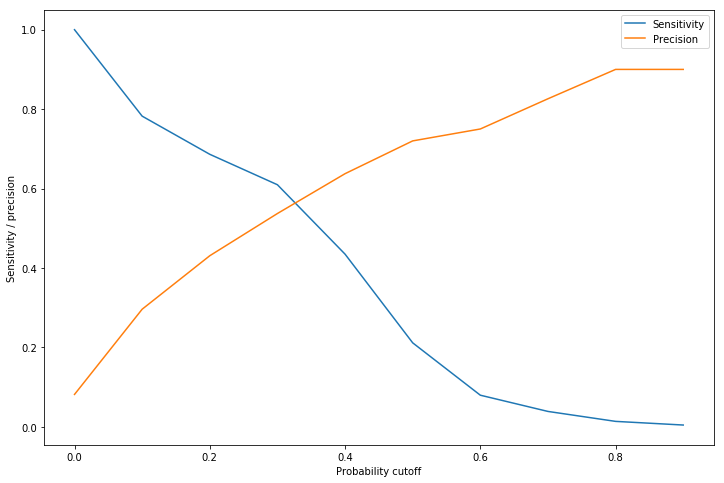

In [230]:
fig = plt.figure(figsize = (12,8))
x=np.arange(0,1,0.1)
#plt.plot(x,accuracy)
plt.plot(x,sensitivity)
plt.plot(x,precision)
plt.xlabel('Probability cutoff')
plt.ylabel('Sensitivity / precision')
plt.legend(['Sensitivity', 'Precision'], loc='upper right')
plt.show()

In [231]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,pred_0.0,pred_0.1,pred_0.2,pred_0.3,pred_0.4,pred_0.5,pred_0.6,pred_0.7,pred_0.8,pred_0.9,final_predicted
88442,0,0.063361,88442,0,1,0,0,0,0,0,0,0,0,0,0
13000,1,0.000087,13000,0,1,0,0,0,0,0,0,0,0,0,0
59119,0,0.007933,59119,0,1,0,0,0,0,0,0,0,0,0,0
88360,0,0.096392,88360,0,1,0,0,0,0,0,0,0,0,0,0
75004,0,0.027091,75004,0,1,0,0,0,0,0,0,0,0,0,0


In [232]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[20977,  1028],
       [  764,  1193]], dtype=int64)

##### Training Score

In [233]:


#Let's check the overall accuracy.
print("Accuracy: ",metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final['pred_0.3']))
print("Recall ",metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final['pred_0.3']))
print("Precision",metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final['pred_0.3']))
print("ROC/AUC",metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final['Churn_Prob']))

Accuracy:  0.9252149236290794
Recall  0.6096065406234031
Precision 0.5371454299864926
ROC/AUC 0.880835242420052


### Test Score

In [234]:
X_test_sm = sm.add_constant(x_test[col])

In [235]:
x_test[col].columns.values

array(['arpu_6', 'roam_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8'],
      dtype=object)

In [236]:
res

In [237]:
y_test_pred = res.predict(X_test_sm).values.reshape(-1)

In [238]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.102429,98766
1,0,0.033518,4004
2,0,0.009458,32194
3,0,0.021442,51170
4,0,0.081860,32711


In [239]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.102429,98766,0
1,0,0.033518,4004,0
2,0,0.009458,32194,0
3,0,0.021442,51170,0
4,0,0.081860,32711,0


In [241]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
accuracy = []
sensitivity = []
precision = []
for i in np.arange(0.1,1,0.1):
    z="pred_"+str(round(i,1))
    y_test_pred_final[z] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
    confusion = metrics.confusion_matrix( y_test_pred_final.Churn, y_test_pred_final[z] )
    accuracy.append(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final[z]))
    sensitivity.append(metrics.recall_score(y_test_pred_final.Churn,  y_test_pred_final[z]))
    precision.append(metrics.precision_score(y_test_pred_final.Churn,  y_test_pred_final[z]))
# Let's see the head
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,pred_0.1,pred_0.2,pred_0.3,pred_0.4,pred_0.5,pred_0.6,pred_0.7,pred_0.8,pred_0.9
0,0,0.102429,98766,0,1,0,0,0,0,0,0,0,0
1,0,0.033518,4004,0,0,0,0,0,0,0,0,0,0
2,0,0.009458,32194,0,0,0,0,0,0,0,0,0,0
3,0,0.021442,51170,0,0,0,0,0,0,0,0,0,0
4,0,0.081860,32711,0,0,0,0,0,0,0,0,0,0


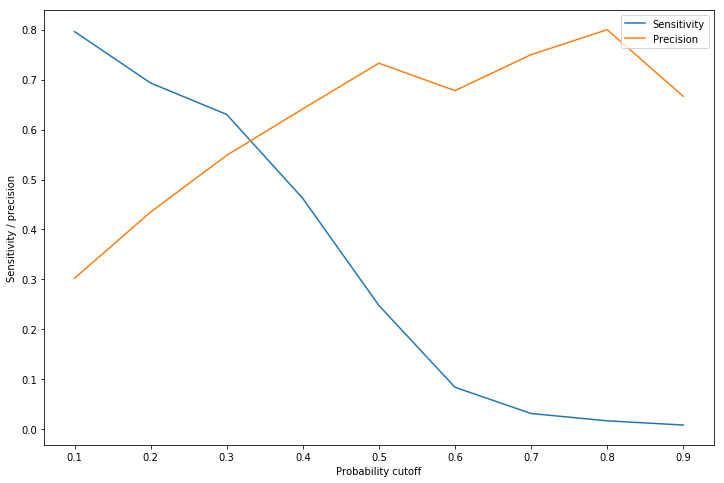

In [242]:
fig = plt.figure(figsize = (12,8))
x=np.arange(0.1,1,0.1)
#plt.plot(x,accuracy)
plt.plot(x,sensitivity)
plt.plot(x,precision)
plt.xlabel('Probability cutoff')
plt.ylabel('Sensitivity / precision')
plt.legend(['Sensitivity', 'Precision'], loc='upper right')
plt.show()

In [243]:
#Let's check the overall accuracy.
print("Accuracy: ", metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final['predicted']))
print("Recall: ", metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final['predicted']))
print("Precision: ", metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final['predicted']))
print("ROC/AUC", metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final['Churn_Prob']))

Accuracy:  0.929394091136705
Recall:  0.6302521008403361
Precision:  0.5484460694698354
ROC/AUC 0.8843322641840055


##### As we can see that the training and test scores are similar, which indicate a robost model.

### Decision Tree

In [91]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\gyane\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import time
# conduct (grid search) cross-validation to find the optimal values 

from sklearn.model_selection import GridSearchCV

In [95]:
weights = np.linspace(0.05,0.95,20)
param_grid = {
    'max_depth': [3,4],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'max_features': [3,5,8],
    'class_weight': [{0:x,1:1.0-x} for x in weights] 
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 5, n_jobs = 4,verbose = 1, scoring='f1')
start = time.time()

grid_search.fit(x_train, y_train)

end = time.time()
print((end - start)/60)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   44.8s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.6min


2.061386227607727


[Parallel(n_jobs=4)]: Done 2400 out of 2400 | elapsed:  2.1min finished


In [251]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.5673426012364874 using {'class_weight': {0: 0.23947368421052628, 1: 0.7605263157894737}, 'max_depth': 4, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [96]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(**grid_search.best_params_)
dt_default.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33421052631578946,
                                     1: 0.6657894736842105},
                       criterion='gini', max_depth=4, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best')

In [97]:
# Making predictions
predictions = dt_default.predict(x_train)

In [98]:
df_y_train =  pd.DataFrame(y_train, columns=['churn'])
df_y_train.head()

,churn
88442,0
13000,1
59119,0
88360,0
75004,0


In [99]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(df_y_train.churn, predictions))
print(metrics.recall_score(df_y_train.churn, predictions))
print(metrics.precision_score(df_y_train.churn, predictions))
print(metrics.roc_auc_score(df_y_train.churn,predictions))

0.9329772139220432
0.46653040367910065
0.6189830508474576
0.7204953767997867


In [109]:
# Making predictions
predictions = dt_default.predict(x_test)

(5991,)

In [106]:
df_y_test =  pd.DataFrame(y_test, columns=['churn'])
df_y_test.head()

,churn
98766,0
4004,0
32194,0
51170,0
32711,0


In [108]:
df_y_test.shape

(5991, 1)

In [107]:
# Putting features
features = list(x_train.columns[0:])
features

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [102]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [103]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("dt_telecom_churn_no_scale.pdf")

True

In [104]:
# the pdf with the tree will be written in this directory on your system
import os
os.getcwd()

'C:\\Users\\gyane\\Documents\\Upgrad ML Models\\PCA\\Telecom Churn Group Case Study'

In [110]:
print("Accuracy: ",metrics.accuracy_score(df_y_test.churn, predictions))
print("Recall: ",metrics.recall_score(df_y_test.churn, predictions))
print("Precision: ",metrics.precision_score(df_y_test.churn, predictions))
print("ROC/AUC: ",metrics.roc_auc_score(df_y_test.churn,predictions))

Accuracy:  0.9349023535302955
Recall:  0.46218487394957986
Precision:  0.6214689265536724
ROC/AUC:  0.7189437515713448


### Conclusion

##### As we can see that the scores of logistic regression are comparitevely better than decision tree so we are selecting logistic regression model as our final model

##### Our Top Predictors as per logistic regression model are 
    - arpu_6
    - roam_og_mou_8
    - std_og_t2t_mou_8
    - std_og_t2m_mou_8
    - isd_og_mou_8
    - loc_ic_mou_8
    - total_ic_mou_7
    - spl_ic_mou_8
    - total_rech_num_8
    - last_day_rch_amt_8
    - fb_user_8